# 1. Deep Learning 이란 무엇인가?

- 비선형 데이터(Non-linear dataset) 문제를 해결하기 위해서는 hidden layer 1층을 추가한 Nueral network를 구현할 것이다.

<img src="img/classification_kiank.png" width='500'>

- 각각의 데이터 $x^{(i)}$에 대해:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1] (i)}\tag{1}$$ <br/>
$$a^{[1] (i)} = ReLU(z^{[1] (i)})\tag{2}$$ <br/>
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2] (i)}\tag{3}$$ <br/>
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$ <br/>
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$ <br/>

- 데이터셋에 대해 손실함수(Loss function):
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

- Reminder : 신경망을 구현하기 위한 Steps:
    1. Neural network 구조 설계 (e.g., number of input units,  number of hidden units, etc).
    2. 모델 파라미터 초기화
    3. Loop:
        - forward pass
        - 손실 값 계산
        - 그레디언트 계산을 위한 backward 전파
        - 파라미터 업데이트(Gradient descent algorithm)

# 2. 본격적으로 시작하기에 앞서서 ... 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lib.OL_utils import sigmoid, Logistic, plot, generate_data, draw_boundary 

In [2]:
plt.rcParams['figure.figsize'] = (11, 8)

In [3]:
# ReLU 함수정의
def ReLU(z):
    return np.maximum(0, z)

In [4]:
# ReLU 함수정의
def sigmoid(z):
    '''
    Compute the sigmoid of z
    
    Arguments: A scalar or numpy array of any size
    '''
    return 1 / (1 + np.exp(-z))

# 3. Neural Network 구조설계
**다음 세개의 변수를 지정:**
    - n_x: 입력단(input layer)의 크기(number of units)
    - n_h: hidden layer의 크기(number of units) --> (4로 세팅) 
    - n_y: 출력단(output layer)의 크기(number of units)

In [5]:
def layer_sizes(X, Y):
    """   
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ###
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

# 3. Parameter 초기화
**Instructions**:
- Parameter shape 체크하기
- Parameter의 각 요소는 랜덤 값으로 initialization
    - Use: `np.random.randn(a,b) * init_scale_factor` ,(a,b)는 각 파라미터 shape.

In [6]:
def initialize_parameters(n_x, n_h, n_y, init_scale_factor=1.0):
    """
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2019)
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h, n_x) * init_scale_factor
    b1 = np.random.randn(n_h, 1) * init_scale_factor
    W2 = np.random.randn(n_y, n_h) * init_scale_factor
    b2 = np.random.randn(n_y, 1) * init_scale_factor
    ### END CODE HERE ###
    
    # 파라미터 shape 체크
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

# 4. The Loop

**Instructions:** forward
- 위의 수식 부분 참조
- `sigmoid()` 함수는 OL_utils.py에서 정의됨
- `ReLU()`함수 사용
- 단계적으로 구현해야 할 것:
    1. Logistic 구현할때와 마찬가지로 `initialize_parameters()`함수의 output을 input으로 받음
    2. `forward()`를 구현하고 $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}(=\hat{Y})$를 계산 ($\hat{Y}$은 학습데이터 전체에 대한 prediction 벡터를 나타냄)
- backward 전파 연산에 필요한 값들은 "`cache`"에 저장. 이 `cache`는 `backward()`함수의 인풋으로 들어갈 것

In [7]:
def forward(X, parameters):
    """
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### END CODE HERE ###
    
    # Implement Forward Propagation to calculate A2(=Yhat) (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    ### END CODE HERE ###
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

**Instructions:** Compute cost

$- \sum\limits_{i=1}^{m}  y^{(i)}\log(\hat{y}^{(i)})$ 


In [8]:
def compute_cost(A2, Y, parameters):
    """
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of example
    
    # Compute the cross-entropy cost
    ### START CODE HERE ### (≈ 2 lines of code)
    logprobs = -np.multiply(np.log(A2), Y) - np.multiply((1 - Y), np.log(1 - A2))
    cost = np.sum(logprobs) / m
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)     # 파이썬 숫자로 출력하기 위함
                                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

**Instructions : backward()**:

forward동안 계산된 cache를 이용하여 backward propagation 연산을 구현할 수 있다. 실제로 backpropagation연산 구현은 딥러닝에서 굉장히 어려운 일에 속한다. 하단 오른편 6개의 식을 참고하여 구현한다. (왼편 식의 vectorized version)

<img src="img/backprop.png" width='250' align='Left'>

In [9]:
def backward(parameters, cache, X, Y):
    """
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters['W1']
    W2 = parameters['W2']
    ### END CODE HERE ###
        
    # Retrieve also A1, Z1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache['A1']
    Z1 = cache['Z1']
    A2 = cache['A2']
    ### END CODE HERE ###
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    ### START CODE HERE ### (≈ 8 lines of code, corresponding to 7 equations on slide above)
    dZ2= (A2 - Y) / m
    dW2 = np.dot(dZ2, A1.T)
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)
    dA1[Z1 < 0] = 0
    dZ1 = dA1
    dW1 = np.dot(dZ1, X.T)
    db1 = np.sum(dZ1, axis=1, keepdims=True)
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

**Instruction:** 경사하강 알고리즘(Gradient descent algorithm)을 구현

General gradient descent rule: $ \theta = \theta - \alpha \dfrac{\partial J(w) }{ \partial \theta }$  ($\alpha$는 learning rate,  $\theta$는 각 파라미터를 의미한다.)

<img src="img/sgd_bad.gif" style="width:400;height:400;" align='Left'>

In [10]:
def update_parameters(parameters, grads, learning_rate=0.01):
    """    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    ## END CODE HERE ###
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

**Instruction :**위에서 구현한 코드 `NN_2L()`함수로 합치기

위에서 neural network를 학습하기 위한 함수들을 하나의`NN_2L()`함수로 구현
- X, Y, n_h, num_iterations 등을 인수로 받고 파라미터 딕셔너리를 리턴
- Loop statement를 이용해 num_iterations만큼 파라미터 업데이트

In [11]:
def NN_2L(X, Y, n_h, num_iterations=10000, init_scale_factor=1.0, learning_rate=0.01, print_cost=False):
    """
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y, init_scale_factor)

    # Loop (gradient descent)
    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration [%i/%i]: %f" % (i, num_iterations, cost))

    return parameters

**Instruction :** 데이터 클래스 예측(prediction)

**실습 :** 클래스를 예측하는 `predict()`함수를 구현하시오.

 - `forward()`함수에서 출력된 값을 이용한다.

**Recall**: $y_{pred} = \mathbb 1 \{ \hat{y} > 0.5\} = \begin{cases}
      1 & \text{if}\ \hat{y} > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$


In [12]:
def predict(parameters, X):
    """
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward(X, parameters)
    predictions = np.round(A2)
    ### END CODE HERE ###
    
    return predictions

In [13]:
# Accuracy 계산
def get_accuracy(parameters, X, Y):
    m = X.shape[1]
    predictions = predict(parameters, X)
    return (predictions == Y).sum() / m

# 5. Non-linear synthetic data

 - XOR function
 - Moon-shaped dataset
 - Circle dataset
 - Image Data

### (1) XOR function

In [14]:
# XOR inputs & Corresponding outputs
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
Y_train = np.array([[0, 1, 1, 0]])

In [15]:
parameters = NN_2L(X_train, Y_train, n_h=2, num_iterations=10000, learning_rate=0.1, print_cost=True)
#print('Train acc : {:.2%}'.format(get_accuracy(parameters, X_train, Y_train)))

Cost after iteration [0/10000]: 0.718675
Cost after iteration [1000/10000]: 0.474710
Cost after iteration [2000/10000]: 0.048546
Cost after iteration [3000/10000]: 0.015586
Cost after iteration [4000/10000]: 0.008793
Cost after iteration [5000/10000]: 0.006024
Cost after iteration [6000/10000]: 0.004544
Cost after iteration [7000/10000]: 0.003631
Cost after iteration [8000/10000]: 0.003014
Cost after iteration [9000/10000]: 0.002572


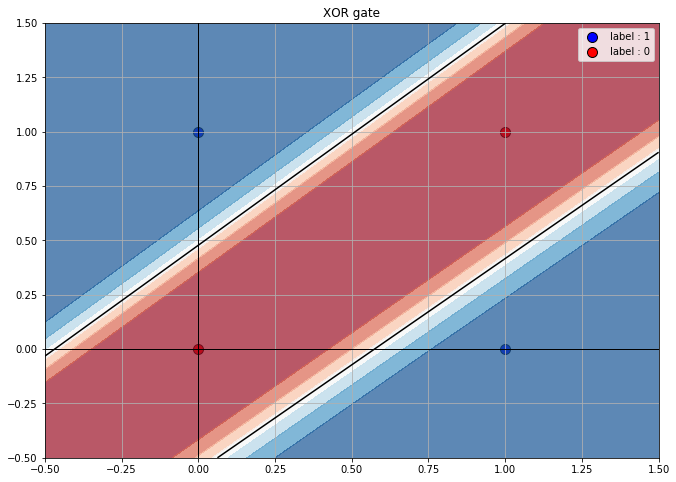

In [16]:
draw_boundary(parameters, X_train, Y_train, title='XOR gate', s=100, axis=True, xlim=(-.5, 1.5), ylim=(-.5, 1.5), colormap=True)

### (2) Moon-shaped dataset

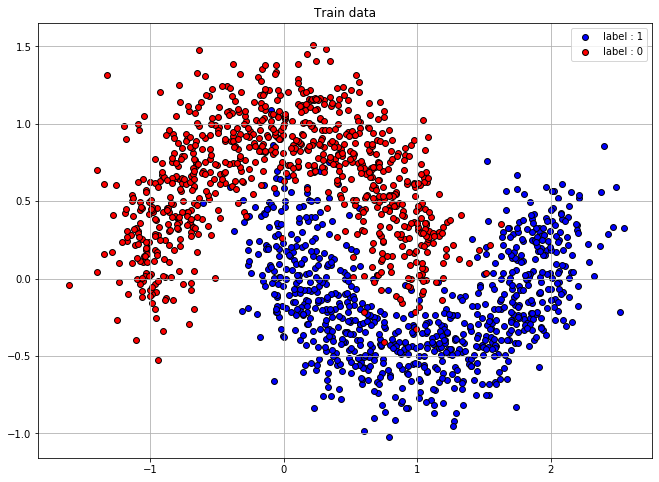

In [17]:
(X_train, Y_train), (X_test, Y_test) = generate_data(2000, 'Moon')
plot(X_train, Y_train)

In [18]:
parameters = NN_2L(X_train, Y_train.reshape(1, -1), n_h=10, num_iterations=20000, learning_rate=0.1, print_cost=True)
print('Train acc : {:.2%}'.format(get_accuracy(parameters, X_train, Y_train)))
print('Test acc : {:.2%}'.format(get_accuracy(parameters, X_test, Y_test)))

Cost after iteration [0/20000]: 0.529231
Cost after iteration [1000/20000]: 0.159601
Cost after iteration [2000/20000]: 0.115871
Cost after iteration [3000/20000]: 0.102325
Cost after iteration [4000/20000]: 0.096946
Cost after iteration [5000/20000]: 0.094402
Cost after iteration [6000/20000]: 0.092188
Cost after iteration [7000/20000]: 0.089973
Cost after iteration [8000/20000]: 0.088816
Cost after iteration [9000/20000]: 0.087912
Cost after iteration [10000/20000]: 0.087433
Cost after iteration [11000/20000]: 0.087162
Cost after iteration [12000/20000]: 0.086974
Cost after iteration [13000/20000]: 0.086624
Cost after iteration [14000/20000]: 0.086340
Cost after iteration [15000/20000]: 0.086101
Cost after iteration [16000/20000]: 0.085914
Cost after iteration [17000/20000]: 0.085756
Cost after iteration [18000/20000]: 0.085622
Cost after iteration [19000/20000]: 0.085517
Train acc : 96.75%
Test acc : 89.50%


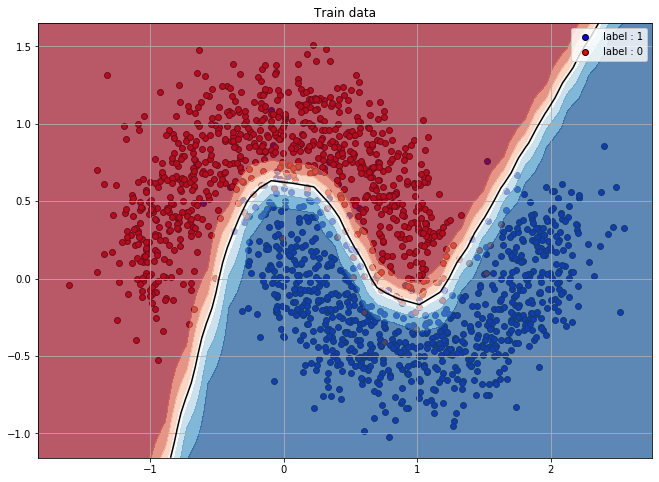

In [19]:
draw_boundary(parameters, X_train, Y_train, colormap=True)

### (3) Circle dataset

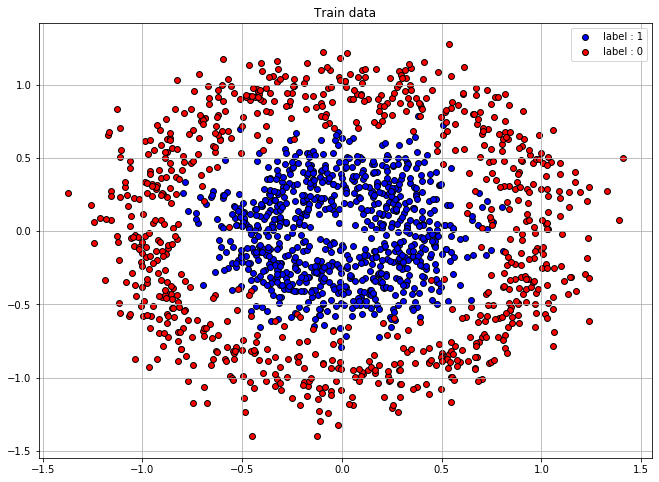

In [20]:
(X_train, Y_train), (X_test, Y_test) = generate_data(2000, 'Circle')
plot(X_train, Y_train)

In [21]:
parameters = NN_2L(X_train, Y_train.reshape(1, -1), n_h=10, num_iterations=10000, learning_rate=0.1, print_cost=True)
print('Train acc : {:.2%}'.format(get_accuracy(parameters, X_train, Y_train)))
print('Test acc : {:.2%}'.format(get_accuracy(parameters, X_test, Y_test)))

Cost after iteration [0/10000]: 1.272670
Cost after iteration [1000/10000]: 0.121537
Cost after iteration [2000/10000]: 0.094065
Cost after iteration [3000/10000]: 0.084671
Cost after iteration [4000/10000]: 0.080906
Cost after iteration [5000/10000]: 0.079155
Cost after iteration [6000/10000]: 0.078219
Cost after iteration [7000/10000]: 0.077556
Cost after iteration [8000/10000]: 0.077151
Cost after iteration [9000/10000]: 0.076888
Train acc : 97.19%
Test acc : 86.25%


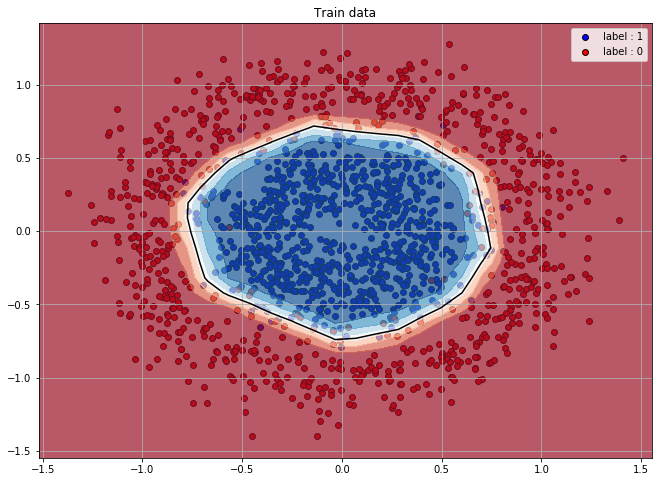

In [22]:
draw_boundary(parameters, X_train, Y_train, colormap=True)

### (4) Image Data

In [23]:
# (cat/non-cat) 데이터셋 로드
from lib.RL_utils import load_dataset

X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T

X_train = X_train_flatten / 255.
X_test = X_test_flatten / 255.

Y_train = Y_train_orig.reshape(1, -1)
Y_test = Y_test_orig.reshape(1, -1)

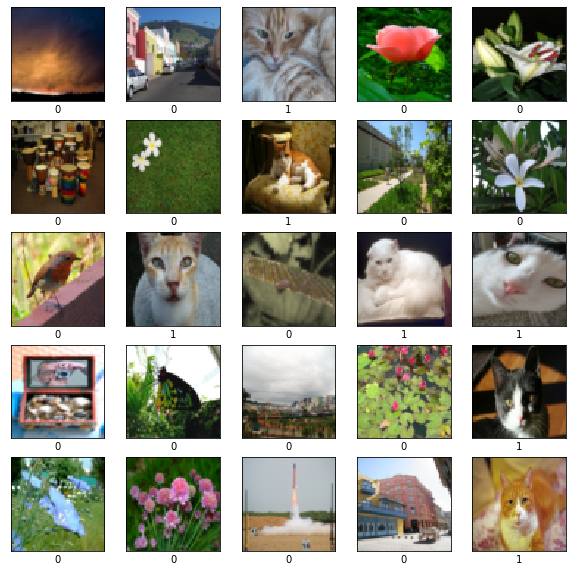

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_orig[i], cmap=plt.cm.binary)
    plt.xlabel(Y_train_orig[i])
plt.show()

In [25]:
parameters = NN_2L(X_train, Y_train, n_h=7, num_iterations=10000, init_scale_factor=0.01, learning_rate=0.0075, print_cost=True)

Cost after iteration [0/10000]: 0.691478
Cost after iteration [1000/10000]: 0.319468
Cost after iteration [2000/10000]: 0.051610
Cost after iteration [3000/10000]: 0.019406
Cost after iteration [4000/10000]: 0.010624
Cost after iteration [5000/10000]: 0.006973
Cost after iteration [6000/10000]: 0.005064
Cost after iteration [7000/10000]: 0.003919
Cost after iteration [8000/10000]: 0.003167
Cost after iteration [9000/10000]: 0.002640


In [27]:
predictions = predict(parameters, X_test)

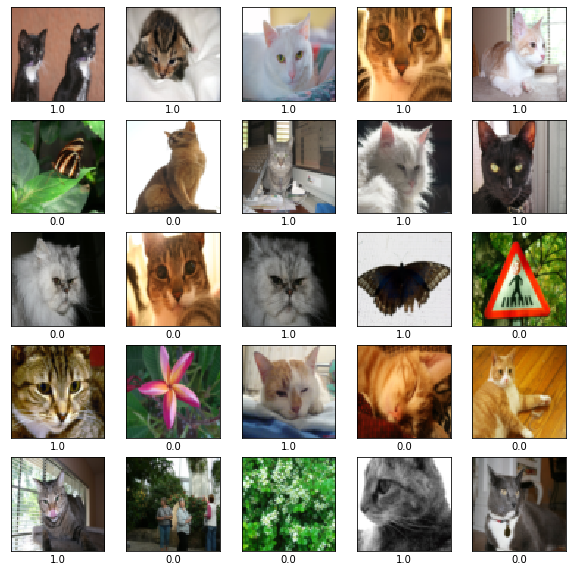

In [28]:
# Show images and labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test_orig[i], cmap=plt.cm.binary)
    plt.xlabel(predictions.reshape(-1,)[i])
plt.show()

In [29]:
# print('Train acc : {:.2%}'.format(get_accuracy(parameters, X_train, Y_train)))
print('Test acc : {:.2%}'.format(get_accuracy(parameters, X_test, Y_test)))

Test acc : 72.00%
